In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score


In [4]:
df = pd.read_csv("F:\PYTHAN\PYTHAN\iNeuron\ML\CampusX\Logistic_Regression\Iris.csv")

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 5)

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
df['Species'] = encoder.fit_transform(df['Species'])

In [19]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
25,5.0,3.0,1.6,0.2,0
141,6.9,3.1,5.1,2.3,2
87,6.3,2.3,4.4,1.3,1
22,4.6,3.6,1.0,0.2,0
127,6.1,3.0,4.9,1.8,2


In [21]:
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

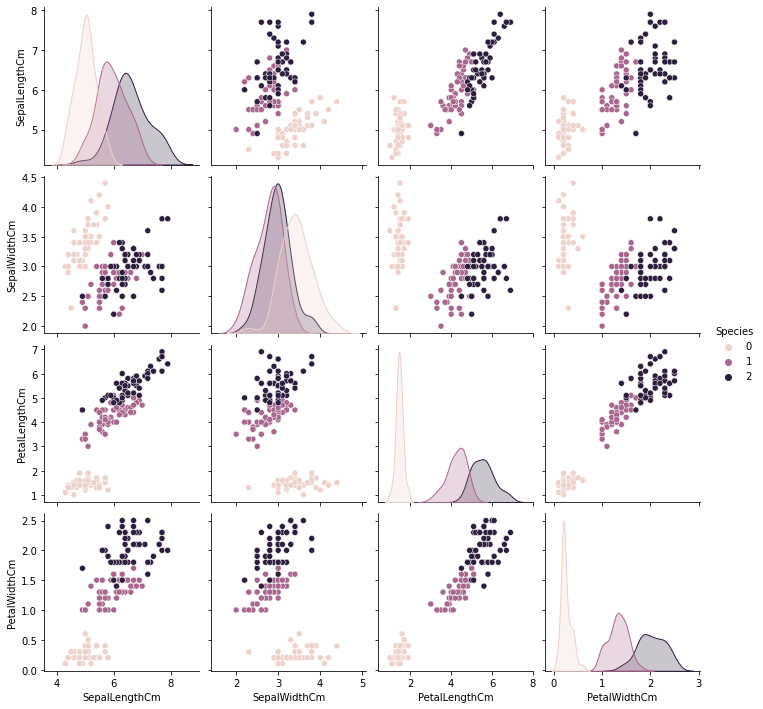

In [22]:
sns.pairplot(df,hue = 'Species')

In [23]:
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0


In [26]:
#From above plot we clearly seen species "0" is totaly seprated so no need to take that label 
#and also we took sepal length and sepal width.
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [27]:
new_df.head(2)

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1


In [28]:
new_df.shape

(99, 3)

In [29]:
x = new_df.iloc[:,:2]
y = new_df['Species']

In [31]:
x.head(1)

,SepalLengthCm,SepalWidthCm
50,7.0,3.2


In [32]:
y.head(1)

50    1
Name: Species, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=10)

In [51]:
clf1.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = clf1.predict(x_test)

In [54]:
clf1.score(x_train,y_train)

0.7468354430379747

In [55]:
accuracy_score(y_test,y_pred)

0.8

In [35]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [37]:
estimators[0][1]

LogisticRegression()

In [41]:
for i in estimators:
    p = cross_val_score(i[1],x,y,cv = 10,scoring='accuracy')
    print(i[0],np.round(np.mean(p),2))

lr 0.75
rf 0.65
knn 0.66



# Hard Voting

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
vc1 = VotingClassifier(estimators = estimators,voting = 'hard')
h = cross_val_score(vc1,x,y,cv = 10,scoring = 'accuracy')

In [48]:
print(np.round(np.mean(h),2))

0.67


In [56]:
vc2 = VotingClassifier(estimators = estimators,voting = 'soft')
h1 = cross_val_score(vc2,x,y,cv = 10,scoring = 'accuracy')
print(np.round(np.mean(h1),2))

0.68
